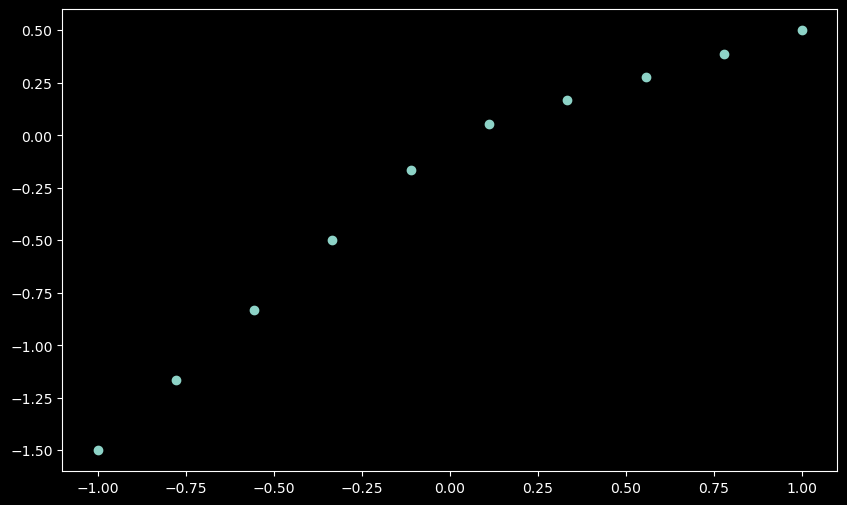

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")
plt.figure(figsize=(10,6))

x = np.linspace(-1,1,10)
plt.scatter(x, x-.5*np.abs(x));

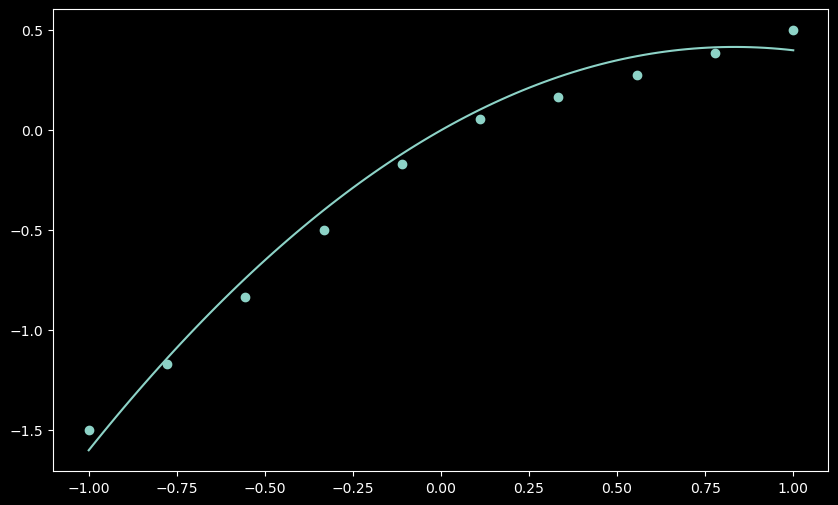

In [3]:
plt.figure(figsize=(10,6))

x = np.linspace(-1,1,10)
plt.scatter(x, x-.5*np.abs(x))

x = np.linspace(-1,1,100)
plt.plot(x, x-.6*x*x)

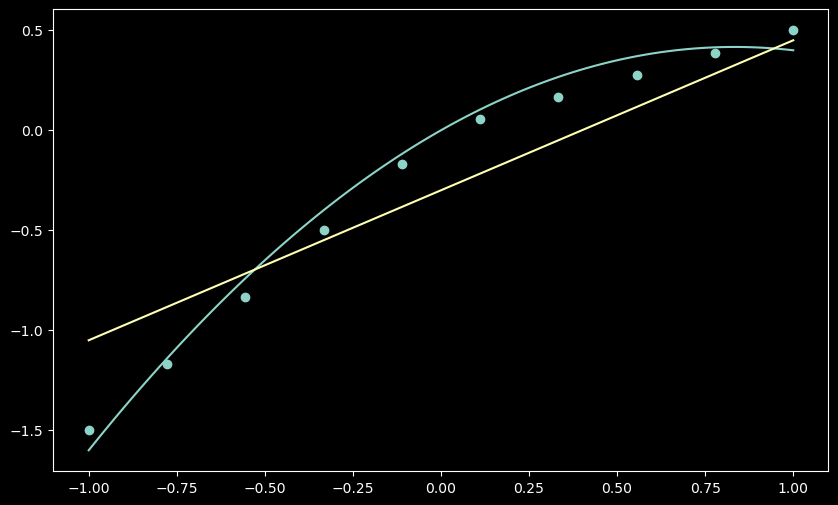

In [4]:
plt.figure(figsize=(10,6))

x = np.linspace(-1,1,10)
plt.scatter(x, x-.5*np.abs(x))

x = np.linspace(-1,1,100)
plt.plot(x, x-.6*x*x)
plt.plot(x, .75*x-.3)

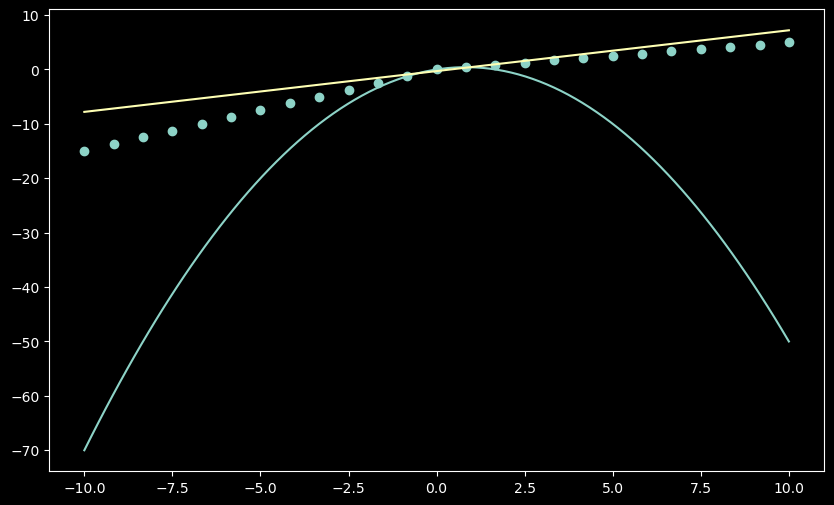

In [5]:
plt.figure(figsize=(10,6))

x = np.linspace(-10,10,25)
plt.scatter(x, x-.5*np.abs(x))

x = np.linspace(-10,10,100)
plt.plot(x, x-.6*x*x)
plt.plot(x, .75*x-.3)

## Proces nauczania w Machine Leatning
1. Przygotowanie danych
2. Podział danych
3. Budowanie modelu
4. Test dokładności

In [7]:
import pandas as pd
df = pd.read_csv('data/spam.csv', encoding='ISO-8859-1')

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.rename(columns = {'v1': 'class_label', 'v2': 'message'}, inplace=True)
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df['class_label'].value_counts()

class_label
ham     4825
spam     747
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt
import numpy as np
labels = ['ham', 'spam']
counts = df['class_label'].value_counts().to_list()
ypos = np.arange(len(labels))
ypos

array([0, 1])

<BarContainer object of 2 artists>

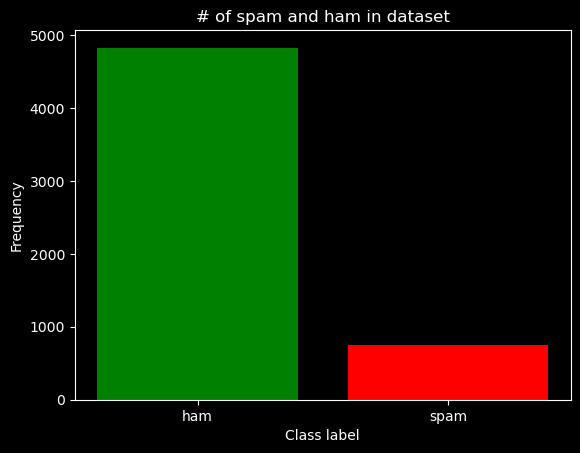

In [18]:
plt.xticks(ypos, labels)
plt.xlabel("Class label")
plt.ylabel("Frequency")
plt.title("# of spam and ham in dataset")
plt.bar(ypos, counts, color=['g', 'r'])

In [19]:
df['class_label'] = df['class_label'].apply(lambda x: 1 if x == 'spam' else 0)

In [20]:
df.head()

,class_label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['message'], df['class_label'], test_size = 0.3, random_state = 17)

In [23]:
print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))

rows in test set: (1672,)
rows in train set: (3900,)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = x_train.tolist()

vectorizer = TfidfVectorizer(
    input = 'content',
    lowercase=True,
    stop_words='english'
)
features_train_transformed = vectorizer.fit_transform(data)
features_test_fransformed = vectorizer.transform(x_test)

In [25]:
df = pd.DataFrame(features_train_transformed.toarray(), columns = vectorizer.get_feature_names_out())
df.head()

,00,000,008704050406,0121,01223585334,0125698789,02,0207,02072069400,02073162414,...,ìä,ìï,ó_,û_,û_thanks,ûªm,ûªt,ûï,ûïharry,ûò
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB
# train the model
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)

MultinomialNB()

In [29]:
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_fransformed, y_test) * 100))

classifier accuracy 96.59%


In [30]:
from sklearn.svm import SVC
# train the model
classifier = SVC()
classifier.fit(features_train_transformed, y_train)

SVC()

In [32]:
print("classifier accuracy {:.2f}%".format(classifier.score(features_train_transformed, y_train) * 100)) # ZBRODNIA!!!

classifier accuracy 99.77%


In [33]:
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_fransformed, y_test) * 100))

classifier accuracy 97.61%


In [35]:
labels = classifier.predict(features_test_fransformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

actual = y_test.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print('Confusion matrix :')
print(results)
print('Accuracy Score :', accuracy_score(actual, predicted))
print('Report :')
print(classification_report(actual, predicted))
score_2 = f1_score(actual, predicted, average='binary')
print('F-Measure %.3f' % score_2)

Confusion matrix :
[[1441    1]
 [  39  191]]
Accuracy Score : 0.9760765550239234
Report :
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1442
           1       0.99      0.83      0.91       230

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.95      1672
weighted avg       0.98      0.98      0.98      1672

F-Measure 0.905


## Support Vector Machines

In [37]:
from sklearn.svm import SVC
# train the model
classifier = SVC()
classifier.fit(features_train_transformed, y_train)

SVC()

In [38]:
print("classifier accuracy {:.2f}".format(classifier.score(features_test_fransformed, y_test)*100))

classifier accuracy 97.61


In [39]:
labels = classifier.predict(features_test_fransformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

actual = y_test.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print('Confusion matrix :')
print(results)
print('Accuracy Score :', accuracy_score(actual, predicted))
print('Report :')
print(classification_report(actual, predicted))
score_2 = f1_score(actual, predicted, average='binary')
print('F-Measure %.3f' % score_2)

Confusion matrix :
[[1441    1]
 [  39  191]]
Accuracy Score : 0.9760765550239234
Report :
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1442
           1       0.99      0.83      0.91       230

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.95      1672
weighted avg       0.98      0.98      0.98      1672

F-Measure 0.905


## Kompromis między jakością wyniku a interpretowalnością modelu
Drzewa decyzyjne

In [41]:
from sklearn import tree
treeclf = tree.DecisionTreeClassifier(random_state=0)
treeclf.fit(features_train_transformed, y_train)

DecisionTreeClassifier(random_state=0)

In [42]:
print("classifier accuracy {:.2f}".format(treeclf.score(features_test_fransformed, y_test)*100))

classifier accuracy 96.29


[Text(0.6304347826086957, 0.9285714285714286, 'txt <= 0.058\ngini = 0.23\nsamples = 3900\nvalue = [3383, 517]'),
 Text(0.43478260869565216, 0.7857142857142857, 'claim <= 0.07\ngini = 0.194\nsamples = 3788\nvalue = [3375, 413]'),
 Text(0.532608695652174, 0.8571428571428572, 'True  '),
 Text(0.391304347826087, 0.6428571428571429, 'free <= 0.081\ngini = 0.17\nsamples = 3724\nvalue = [3375, 349]'),
 Text(0.21739130434782608, 0.5, 'www <= 0.068\ngini = 0.14\nsamples = 3610\nvalue = [3337, 273]'),
 Text(0.17391304347826086, 0.35714285714285715, 'service <= 0.081\ngini = 0.123\nsamples = 3572\nvalue = [3337, 235]'),
 Text(0.08695652173913043, 0.21428571428571427, 'mobile <= 0.13\ngini = 0.111\nsamples = 3543\nvalue = [3335, 208]'),
 Text(0.043478260869565216, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.13043478260869565, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.2608695652173913, 0.21428571428571427, 'cum <= 0.149\ngini = 0.128\nsamples = 29\nvalue = [2, 27]'),
 Text(0.217391304347826

<Figure size 1000x600 with 0 Axes>

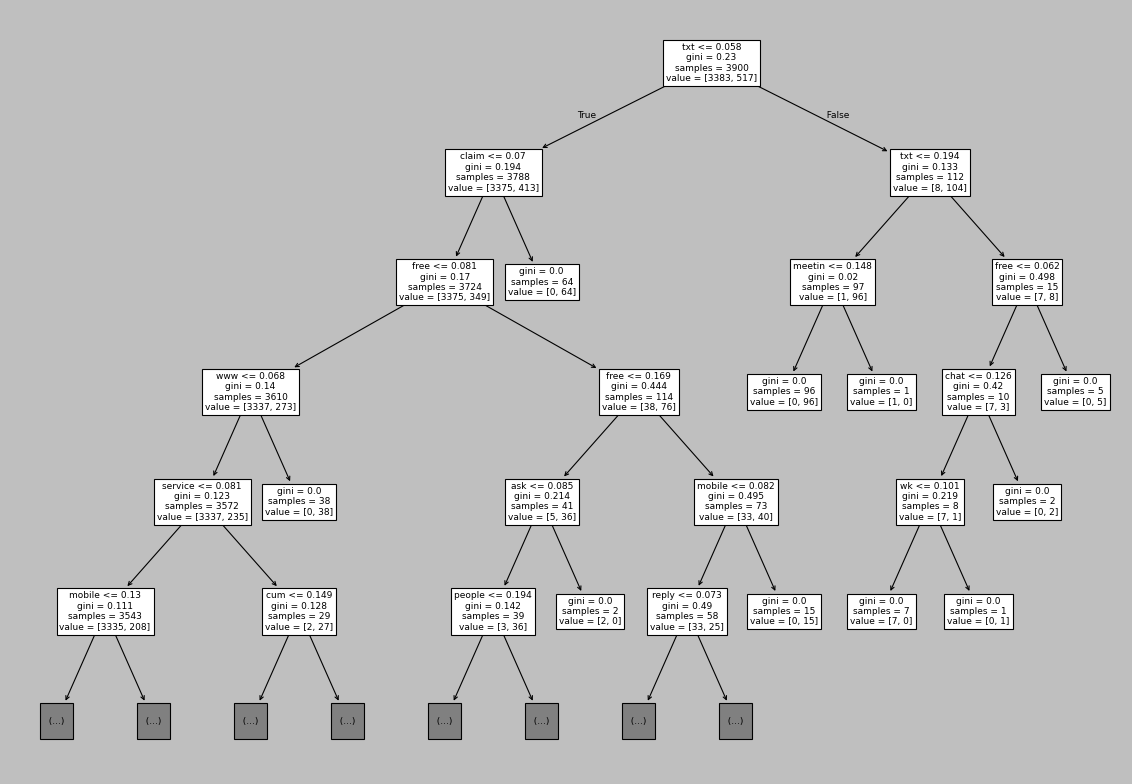

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))
plt.style.use("classic")
plt.figure(figsize=(18,12))
tree.plot_tree(treeclf, max_depth=5, feature_names=df.columns)